# Загрузите датасет breast_cancer

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [3]:
X.shape

(569, 30)

In [4]:
y.shape

(569,)

# Выберите два первых признака. Таким образом мы уменьшим размерность задачи. У нас была задача множественной классификации, а стала - бинарная.

In [5]:
X_2d = X[:, :2]
X_2d.shape

(569, 2)

In [6]:
y.shape

(569,)

# Разделите датасет на обучающую и тестовую выборки в пропорции     80-20

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=0)

# Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели

In [8]:
clf = SVC(C=0.01, kernel="rbf")
clf.fit(X_train, y_train)

print(f"Score (train): {clf.score(X_train, y_train)}")
print(f"Score (test): {clf.score(X_test, y_test)}")

Score (train): 0.6923076923076923
Score (test): 0.6666666666666666


# Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):

a. собрать больше объектов наблюдения;

b. провести обучение на меньшем объеме данных;

c. исключить часть признаков из модели;

d. добавить новые признаки в модель;

e. добавить полиномиальные признаки;

f. попробовать более сложные модели;

g. попробовать более простые модели;

h. увеличить регуляризацию модели;

i. уменьшить регуляризацию модели;

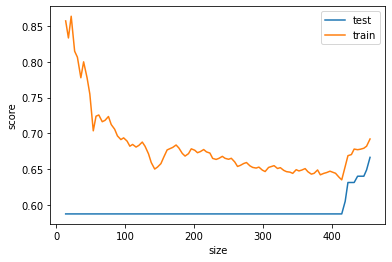

In [9]:
data = np.linspace(len(X_train) // 100 + 10, len(X_train), 100, dtype=int)
test_scores = []
train_scores = []

for i in data:
    clf = SVC(C=0.01, kernel='rbf')
    x_ = X_train[:i]
    y_ = y_train[:i]
    clf.fit(x_, y_)
    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(x_, y_))

ax = plt.axes()
ax.plot(data, test_scores, label="test")
ax.plot(data, train_scores, label="train")
ax.set_xlabel('size')
ax.set_ylabel('score')
_ = ax.legend()

# Проверьте выдвинутую гипотезу и попробуйте улучшить модель в соответствии с выбранными рекомендациями. Проверьте, увеличивается ли тестовая точность. Сделайте вывод.

In [10]:
clf = SVC(C=0.01, kernel="rbf")
clf.fit(X_train, y_train)

print(f"Score (test): {clf.score(X_test, y_test)}")
print(f"Score (train): {clf.score(X_train, y_train)}")

Score (test): 0.6666666666666666
Score (train): 0.6923076923076923


Увеличение регуляризации

In [11]:
clf = SVC(kernel='rbf', C=100)
clf.fit(X_train, y_train)
print(f"Score (test): {clf.score(X_test, y_test)}")
print(f"Score (train): {clf.score(X_train, y_train)}")

Score (test): 0.868421052631579
Score (train): 0.9142857142857143


Вывод: Увеличение регуляризации даёт увеличение точности модели, соответственно модель можно использовать

Использование классификатора k-ближайших соседей

In [12]:
import sklearn.neighbors as neigh

kn = neigh.KNeighborsClassifier(n_neighbors=90, n_jobs=6).fit(X_train,y_train)
print(f"Score (test): {kn.score(X_test, y_test)}")
print(f"Score (train): {kn.score(X_train, y_train)}")

Score (test): 0.8947368421052632
Score (train): 0.8879120879120879


Вывод: Результаты по алгоритму k-ближайших соседей выше, чем SVC(C=0.01, kernel="rbf")

Использование логистической регресси

In [13]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=5000, n_jobs=6).fit(X_train, y_train)
print(f"Score (test): {logr.score(X_test, y_test)}")
print(f"Score (train): {logr.score(X_train, y_train)}")

Score (test): 0.8947368421052632
Score (train): 0.8989010989010989


Вывод: Результаты по логистической регрессии выше, чем SVC(C=0.01, kernel="rbf")

# Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?

In [14]:
pip install ipywidgets

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install tqdm

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/50 [00:00<?, ?it/s]

0.8771929824561403

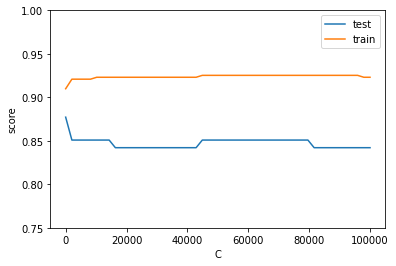

In [16]:
from tqdm.notebook import tqdm
data = np.linspace(1, 100000, 50)

test_scores = []
train_scores = []

for i in tqdm(data):
    clf = SVC(C=i, kernel="rbf")
    clf.fit(X_train, y_train)
    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(X_train, y_train))

ax = plt.axes()
ax.plot(data, test_scores, label="test")
ax.plot(data, train_scores, label="train")
ax.set_xlabel('С')
ax.set_ylabel('score')
ax.set_ylim([0.75, 1])
ax.legend()

max(test_scores)

# Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели.

  0%|          | 0/500 [00:00<?, ?it/s]

0.8771929824561403

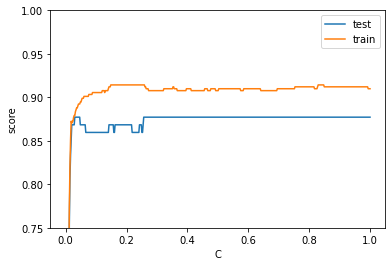

In [17]:
data = np.linspace(0.0001, 1, 500)

test_scores = []
train_scores = []

for i in tqdm(data):
    clf = SVC(C=i, kernel="rbf")

    clf.fit(X_train, y_train)

    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(X_train, y_train))

ax = plt.axes()
ax.plot(data, test_scores, label="test")
ax.plot(data, train_scores, label="train")
ax.set_xlabel('С')
ax.set_ylabel('score')
ax.set_ylim([0.75, 1])
ax.legend()

max(test_scores)

# Вывод

Ессли использовать большее значение C, то модель переобучается, а если меньшее то недообучается

Если увеличивать аргумент C, то точность модели на тренируемых данных будет увеличиваться, а на тестовых уменьшаться

# Найдите методом подбора оптимальное значение параметра регуляризации (примерное)

In [18]:
clf = SVC(kernel='rbf', C=51.1)
clf.fit(X_train, y_train)
print(f'test accuracy: {clf.score(X_test, y_test)}')
print(f'train accuracy: {clf.score(X_train, y_train)}')

test accuracy: 0.8771929824561403
train accuracy: 0.9164835164835164


In [19]:
results = []
for i in range(1,1000):
    value = i * 0.1
    clf = SVC(kernel='rbf', C=value)
    clf.fit(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    train_acc = clf.score(X_train, y_train)
    results.append((value, test_acc, train_acc))
    
results.sort(key=lambda x: x[1])
print(results[-1])

(51.1, 0.8771929824561403, 0.9164835164835164)


При C = 5, получаем 87% на тестовой выборке, 90% на тренировочной что говорит о хорошем результате.
В случае перебора, если С = 51.1, то мы получаем 87.7% и 91.6%

# Повторите два предыдущих пункта для метода опорных векторов с линейным ядром. Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.

График зависимости тестовой и обучающей точности от значения регуляризационного параметра

  0%|          | 0/500 [00:00<?, ?it/s]

0.8947368421052632

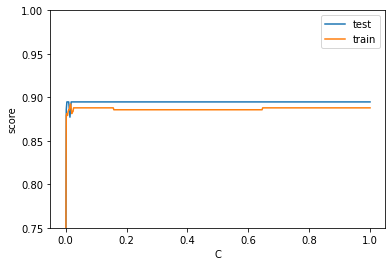

In [20]:
test_scores = []
train_scores = []

for i in tqdm(data):
    clf = SVC(C=i, kernel="linear")

    clf.fit(X_train, y_train)

    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(X_train, y_train))

ax = plt.axes()
ax.plot(data, test_scores, label="test")
ax.plot(data, train_scores, label="train")
ax.set_xlabel('С')
ax.set_ylabel('score')
ax.set_ylim([0.75, 1])
ax.legend()

max(test_scores)

Найти методом подбора оптимальное значение параметра регуляризации

In [21]:
clf = SVC(kernel='linear', C=9.9)
clf.fit(X_train, y_train)
print(f'test accuracy: {clf.score(X_test, y_test)}')
print(f'train accuracy: {clf.score(X_train, y_train)}')

test accuracy: 0.8947368421052632
train accuracy: 0.8879120879120879


In [22]:
results = []
for i in range(1,100):
    value = i * 0.1
    clf = SVC(kernel='linear', C=value)
    clf.fit(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    train_acc = clf.score(X_train, y_train)
    results.append((value, test_acc, train_acc))
    
results.sort(key=lambda x: x[2])
print(results[-1])

(9.9, 0.8947368421052632, 0.8879120879120879)


# Вывод

Модели сильно похожи, соответвственно у нас нет отдельновыделенных особенностей для выделения какой-то конкретной модели